## SISTEMA MTS REGIONALE DI RILEVAZIONE DEI FLUSSI DI TRAFFICO
- Il Sistema regionale di rilevazione del traffico dell’Emilia-Romagna consente il monitoraggio continuo (24 ore su 24) dei flussi di traffico sulle principali tratte stradali.
- È costituito da 281 postazioni dotate di sensori a microonde 
- Le postazioni rilevano i veicoli in transito e li classificano nelle seguenti categorie:
<ul>
  <li>1. MOTOVEICOLI</li>
  <li>2. AUTO E MONOVOLUME</li>
  <li>3. AUTO E MONOVOLUME CON RIMORCHIO</li>
  <li>4. FURGONCINI E CAMIONCINI</li>
    <li>5. CAMION MEDI (fino a 7,5 m)</li>
    <li>6. CAMION GRANDI</li>
    <li>7. AUTOTRENI (autocarri con rimorchio)</li>
    <li>8. AUTOARTICOLATI (trattori con semirimorchio)</li>
    <li>9. AUTOBUS</li>
    <li>10. ALTRI (mezzi speciali, trasporti eccezionali, mezzi agricoli, macchine operatrici...)</li>
</ul>
  
Le categorie (1-4) vengono aggregate e classificate ulteriormente come mezzi leggeri mentre quelle (5-10) come mezzi pesanti 
<h4>In questo notebook viene analizzato il traffico con riferimento al solo anno in corso (Gennaio, Febbraio, Marzo) 2020!</h4>

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import geopandas as gpd
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

data_post = pd.read_csv('MTS_2019_Mese.csv', sep = ';')
data_post.head(2)

,AnnoMese,Postazione,Strada,Giorni Validi,Transiti - Totale,Transiti - Non Classificato,Transiti - Leggeri,Transiti - Pesanti,Transiti - Diurno,Transiti - Notturno,Transiti - Feriali,Transiti - Festivi,TGM - Totale,TGM - Non Classificato,TGM - Leggeri,TGM - Pesanti,TGM - Diurno,TGM - Notturno,TGM - Feriali,TGM - Festivi
0,2019/12,6,SS 12 tra Fiumalbo e Abetone,31,54.449,6.0,53.470,973.000,45.281,9.168,32.247,22.202,1.756,0.0,1.725,31.0,1.461,296.000,1.612,2.018
1,2019/12,7,SS 64 tra Porretta Terme e Sambuca Pistoiese,31,205.446,21.0,201.048,4.377,168.842,36.604,138.580,66.866,6.627,1.0,6.485,141.0,5.447,1.181,6.929,6.079


Asse viario Modena-Sassuolo tra Modena e Baggiovara


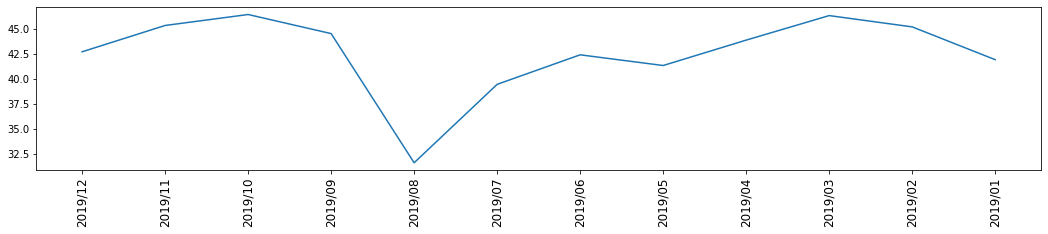

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


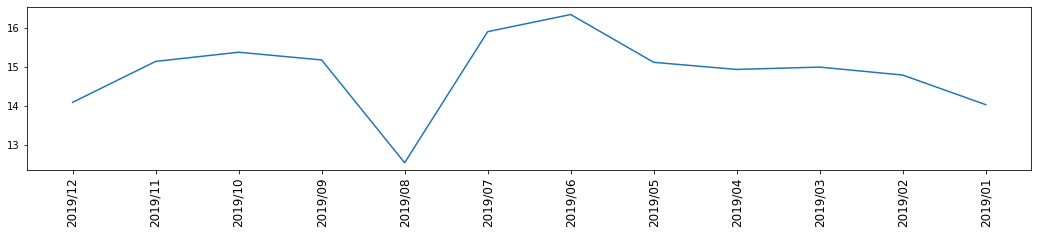

Piazzale Milano (ex SS 9) c/o ponte fiume Po


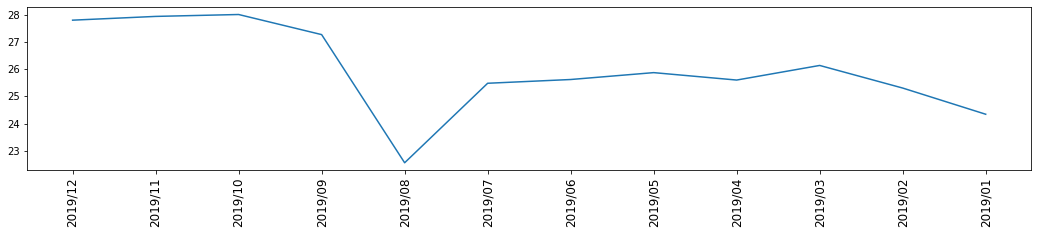

SP 1 da Villafranca di Forlì al confine provinciale


In [11]:
agg_by_strada = data_post.groupby(by = ['Strada']) #['TGM - Totale']
counter = 0
for index, strada in agg_by_strada: 
    print(index)
    counter += 1
    if counter > 3 : break
    strada = strada.fillna(method='ffill')
    strada = strada.set_index(['AnnoMese'])
    plt.figure(figsize = (18, 3))
    plt.plot(strada['TGM - Leggeri'])
    plt.xticks(rotation='vertical', fontsize=12)
    plt.show()